# Crime Against Women 2001-2014 (India)

## The Project is still under Progress !!!

## Downloading Dataset

In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/greeshmagirish/crime-against-women-20012014-india/data'

In [3]:
# !pip install dataset

In [4]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\crime-against-women-20012014-india" (use force=True to force download)


In [5]:
data_dir = "./crime-against-women-20012014-india"

The downloaded folder contains only 1 CSV File, and we will be using that only in this project

In [6]:
import os
os.listdir(data_dir)

['crimes_against_women_2001-2014.csv']

## Data Cleaning

The dataset we downloaded is still not ready for exploratory analysis and visualization! Our dataset might contain some null values, some unnecessary data, irrelevant information etc. In order to get rid of these we'll use Pandas and Numpy.

In [7]:
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv(data_dir + './crimes_against_women_2001-2014.csv')

In [9]:
df

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1,0,0,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3,1,0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7,6,1,20,7,3,0


In [10]:
# Dropping serial no column i.e., 'Unnamed'
df.drop('Unnamed: 0', axis=1, inplace=True)

In [33]:
""" There are numerous value in 'STATE/UT' column where in the state name is in smallcase and capitalcase for different years.
Such data enteries will create variation in analysis. Let's clean that"""

# Clean 'State/UT' column by converting state names to uppercase
df['STATE/UT'] = df['STATE/UT'].str.upper()

# Now, we are left with some ''STATE/UT' to clean (which were left in above command)

df['STATE/UT'] = df['STATE/UT'].replace('A&N Islands', 'A & N ISLANDS')
df['STATE/UT'] = df['STATE/UT'].replace('A&N ISLANDS', 'A & N ISLANDS')
df['STATE/UT'] = df['STATE/UT'].replace('D&N HAVELI', 'D & N HAVELI')
df['STATE/UT'] = df['STATE/UT'].replace('DELHI UT', 'DELHI')

In [13]:
df.head(7)

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,0,0,0,1,0,0,0
6,ANDHRA PRADESH,GUNTUR,2001,54,51,7,139,129,378,0


In [14]:
df.tail(7)

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
10670,DELHI,West,2014,251,546,13,484,63,416,0
10671,DELHI,Total District(s),2014,2096,4034,153,4322,1361,3173,0
10672,LAKSHADWEEP,Lakshadweep,2014,1,0,0,1,2,0,0
10673,LAKSHADWEEP,Total District(s),2014,1,0,0,1,2,0,0
10674,PUDUCHERRY,Karaikal,2014,3,1,0,12,1,1,0
10675,PUDUCHERRY,Puducherry,2014,7,6,1,20,7,3,0
10676,PUDUCHERRY,Total District(s),2014,10,7,1,32,8,4,0


In [15]:
# getting info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10677 entries, 0 to 10676
Data columns (total 10 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             10677 non-null  object
 1   DISTRICT                                             10677 non-null  object
 2   Year                                                 10677 non-null  int64 
 3   Rape                                                 10677 non-null  int64 
 4   Kidnapping and Abduction                             10677 non-null  int64 
 5   Dowry Deaths                                         10677 non-null  int64 
 6   Assault on women with intent to outrage her modesty  10677 non-null  int64 
 7   Insult to modesty of Women                           10677 non-null  int64 
 8   Cruelty by Husband or his Relatives                  10677 non-null  int64 


In [16]:
#getting statistical information of our dataset
df.describe()

,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
count,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000
mean,2007.697949,57.989885,69.888358,20.181699,113.539196,27.419313,209.224314,0.175330
std,4.046874,214.230398,311.623450,98.276531,458.903951,167.806797,905.664362,2.228637
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,8.000000,6.000000,1.000000,10.000000,0.000000,11.000000,0.000000
50%,2008.000000,22.000000,20.000000,5.000000,34.000000,2.000000,50.000000,0.000000
75%,2011.000000,44.000000,49.000000,16.000000,85.000000,12.000000,144.000000,0.000000
max,2014.000000,5076.000000,10626.000000,2469.000000,10001.000000,4970.000000,23278.000000,83.000000


In [17]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

In [18]:
#checking whether there is a null value or not
df.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

Luckily there are 0 null values! (But if there were null values we need to remove that using 'fillna' or 'dropna' methods)

In [19]:
# Checking dtypes
df.dtypes

STATE/UT                                               object
DISTRICT                                               object
Year                                                    int64
Rape                                                    int64
Kidnapping and Abduction                                int64
Dowry Deaths                                            int64
Assault on women with intent to outrage her modesty     int64
Insult to modesty of Women                              int64
Cruelty by Husband or his Relatives                     int64
Importation of Girls                                    int64
dtype: object

In [20]:
# Checking for cells containing '-' in place of data (Usually found in many real-world data)
hyphen = (df == '-')

# Create a DataFrame of the same shape with True where '-' was found
hyphen_locations = hyphen.any()

# Print the results
print("Cells containing '-':")
print(hyphen_locations)

Cells containing '-':
STATE/UT                                               False
DISTRICT                                               False
Year                                                   False
Rape                                                   False
Kidnapping and Abduction                               False
Dowry Deaths                                           False
Assault on women with intent to outrage her modesty    False
Insult to modesty of Women                             False
Cruelty by Husband or his Relatives                    False
Importation of Girls                                   False
dtype: bool


In [21]:
# Check for missing values (NaN)
missing_values = df.isna()
# Count the number of missing values in each column
missing_counts = missing_values.sum()

# Count the number of missing values in each row
missing_rows = missing_values.any(axis=1)
print("Number of missing values in each column:")
print(missing_counts)

Number of missing values in each column:
STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64


Luckily, there are no missing values in the dataset !

# Exploratory Analysis and Visualization

As we've complete data cleaning, now we'll derive some valuable insights from our data and plot it using Matplotlib and Seaborn.

Let's begin by importingmatplotlib.pyplot and seaborn

In [22]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# With the last command, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. 

In [23]:
# Customizing Matplotlib graphs with seaborn, style sheets and rcParams

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Time Series Analysis of Different Types of Crimes (2001-2014)

In [24]:
# Select the relevant columns for your time series analysis
crime_types = ['Rape', 'Kidnapping and Abduction', 'Dowry Deaths', 'Assault on women with intent to outrage her modesty', 
               'Insult to modesty of Women', 'Cruelty by Husband or his Relatives', 'Importation of Girls']
time_series_data = df[df['Year'].between(2001, 2014)][['Year'] + crime_types]

# Set 'Year' as the index for time series analysis
time_series_data.set_index('Year', inplace=True)

# ['Year'] + crime_types: It concatenates the 'Year' column with the list of crime types, resulting in a list of column names that you want to select from the filtered DataFrame.

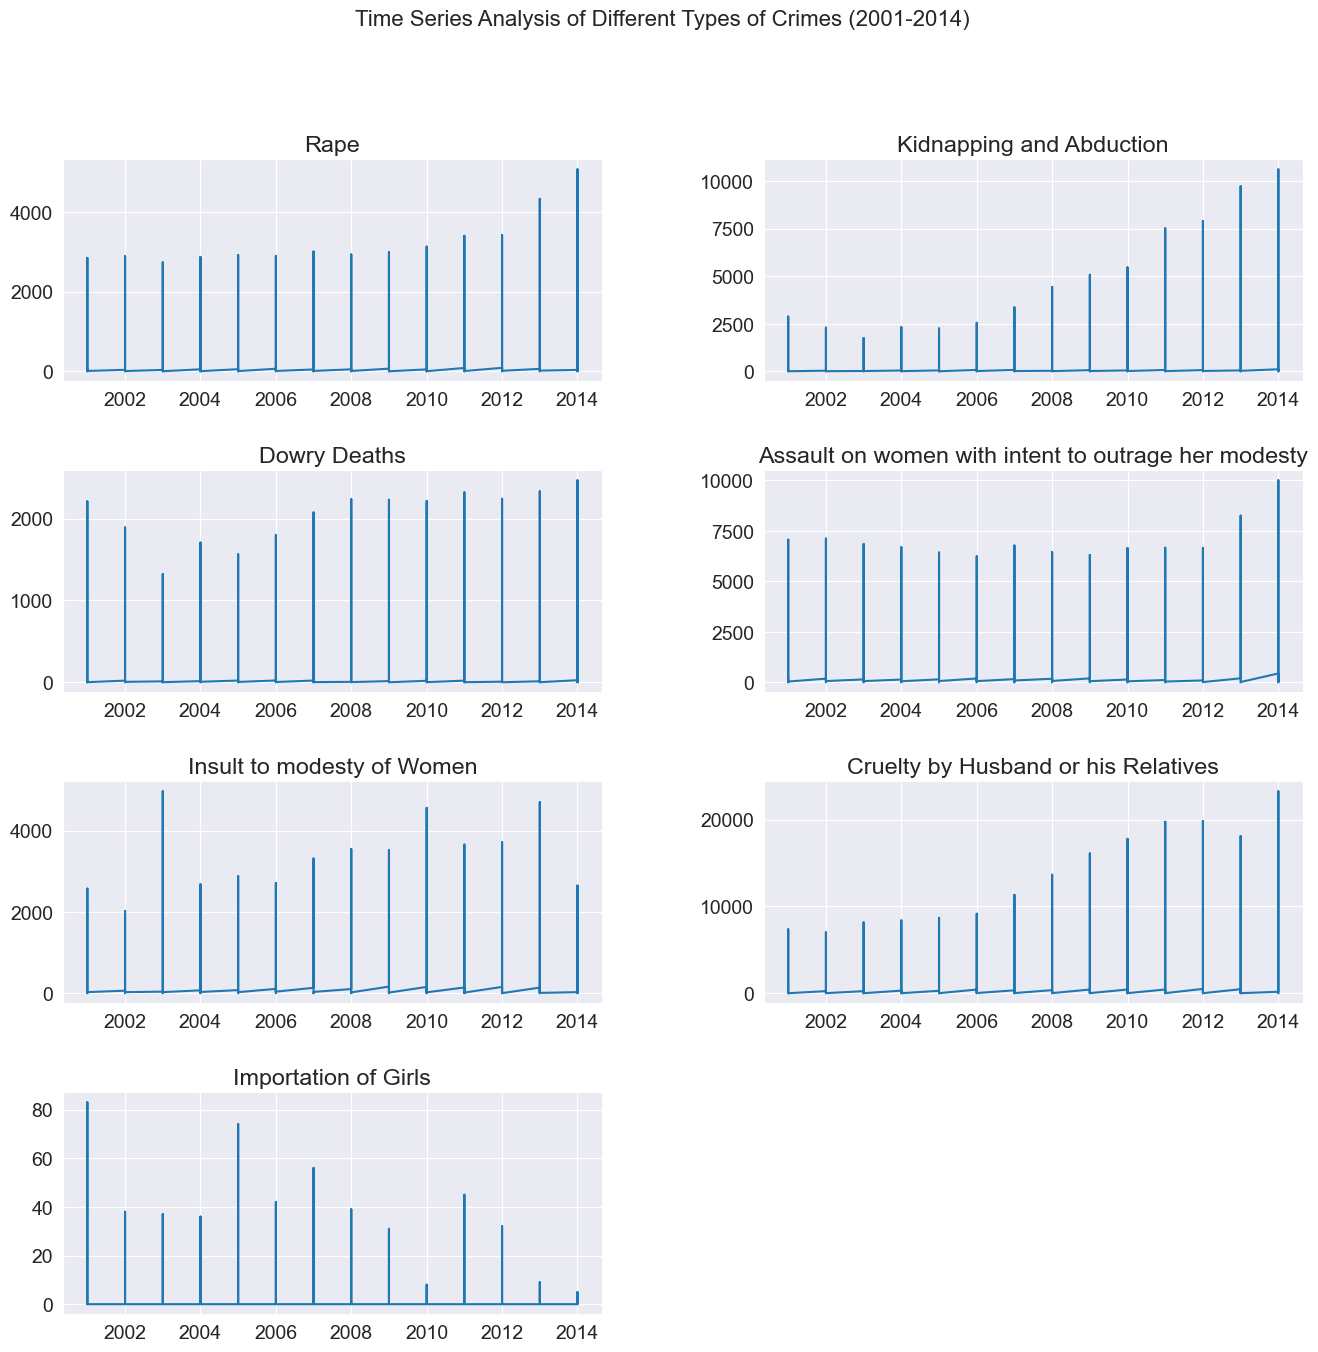

In [25]:
# Create a subplot for each crime type
plt.figure(figsize=(16, 15))
for i, crime_type in enumerate(crime_types):
    plt.subplot(4, 2, i + 1) 
    plt.plot(time_series_data.index, time_series_data[crime_type], label=crime_type)
    plt.title(crime_type)
    plt.grid(True)

plt.suptitle('Time Series Analysis of Different Types of Crimes (2001-2014)', fontsize=16)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.4)

## Comparative Analysis of a particular Crime Rates by States (over 2001 - 2014)

In [30]:
# Get user input for Crime :
# user_crime = input("Enter the crime: ")
user_crime = 'Rape'

In [57]:
# Group data by "STATE/UT" and sum the values for each state
state_summary = df.groupby("STATE/UT")[crime_types].sum()

# Display the resulting table (Sorted in descending order)
state_summary = state_summary.sort_values(by="Rape", ascending=False)
print(state_summary)

# Calculate the sum of all columns
total_summary = state_summary.sum()

# Print the sum of all columns
print("\nTotal Summary (Sum of All Columns):\n", total_summary)

                    Rape  Kidnapping and Abduction  Dowry Deaths  \
STATE/UT                                                           
MADHYA PRADESH     90996                     35608         21090   
UTTAR PRADESH      51150                    135906         57256   
MAHARASHTRA        48974                     30368          9696   
WEST BENGAL        47876                     61158         12308   
RAJASTHAN          45684                     66278         11854   
ASSAM              40190                     62074          3268   
ANDHRA PRADESH     32150                     34504         13844   
BIHAR              30758                     57086         32206   
ODISHA             30480                     25588         10782   
CHHATTISGARH       29308                     11808          2758   
JHARKHAND          22826                     14186          7896   
DELHI              20312                     46586          3758   
KERALA             20030                      44

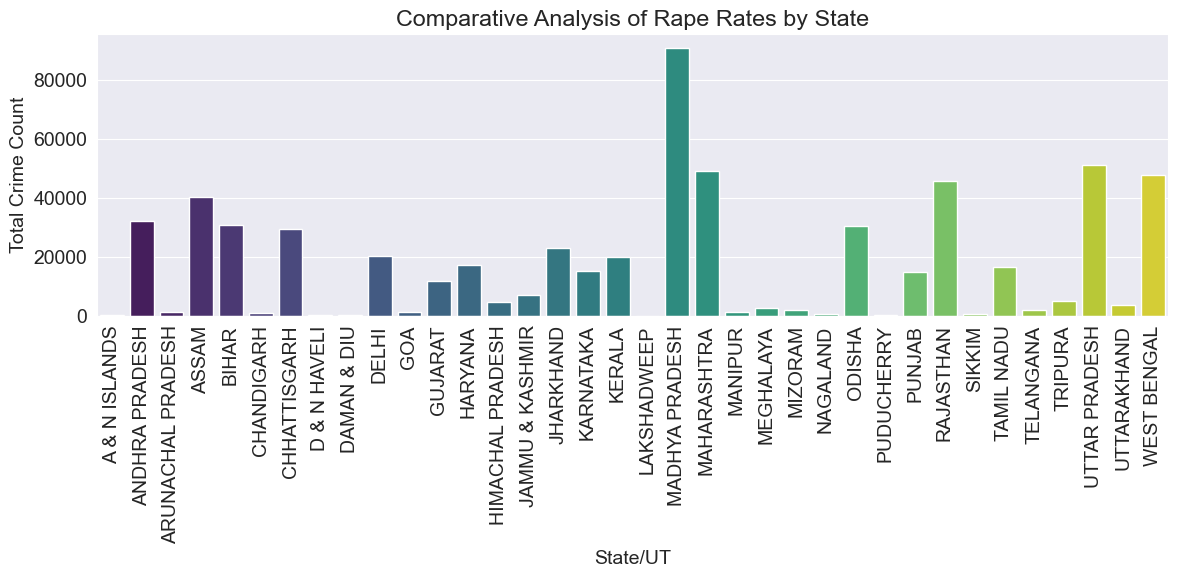

In [58]:
# Group by 'State' and calculate total crime rates
state_crime_data = df.groupby('STATE/UT')[crime_types].sum()

# Plot a bar chart for state-level crime rates
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=state_crime_data, x=state_crime_data.index, y=user_crime, hue='STATE/UT', palette='viridis', dodge=False)
plt.xticks(rotation=90)
plt.xlabel('State/UT')
plt.ylabel('Total Crime Count')
plt.title(f'Comparative Analysis of {user_crime} Rates by State')
plt.tight_layout()

# To show bars with values
""" for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
"""
plt.show()


# The dodge parameter in Seaborn's barplot function is used to control the placement of bars when there are multiple bars at the same x-position

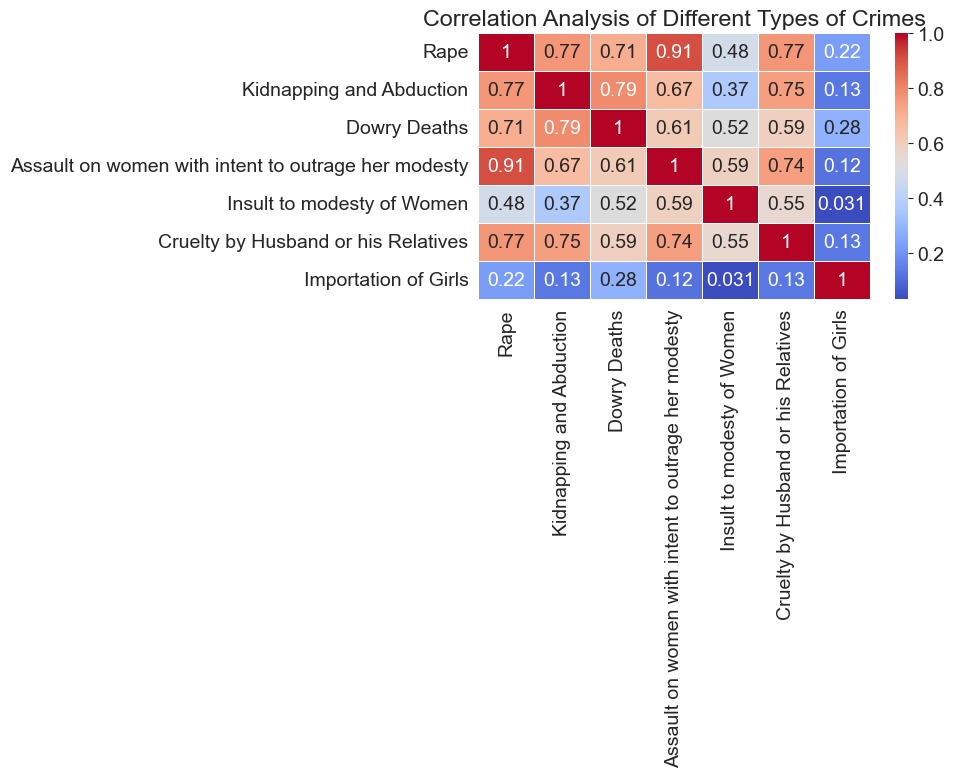

In [36]:
# Select the columns containing the different types of crimes for correlation analysis

# Create a correlation matrix
correlation_matrix = df[crime_types].corr()

# Set up the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Analysis of Different Types of Crimes')
plt.tight_layout()
plt.show()

By examining the heatmap,  you can identify patterns or trends in how different types of crimes relate to each other. For example, if you notice strong positive correlations between specific types of crimes, it could suggest that certain crimes tend to occur together more frequently. Conversely, negative correlations might indicate that certain types of crimes tend to occur less often in conjunction with each other.

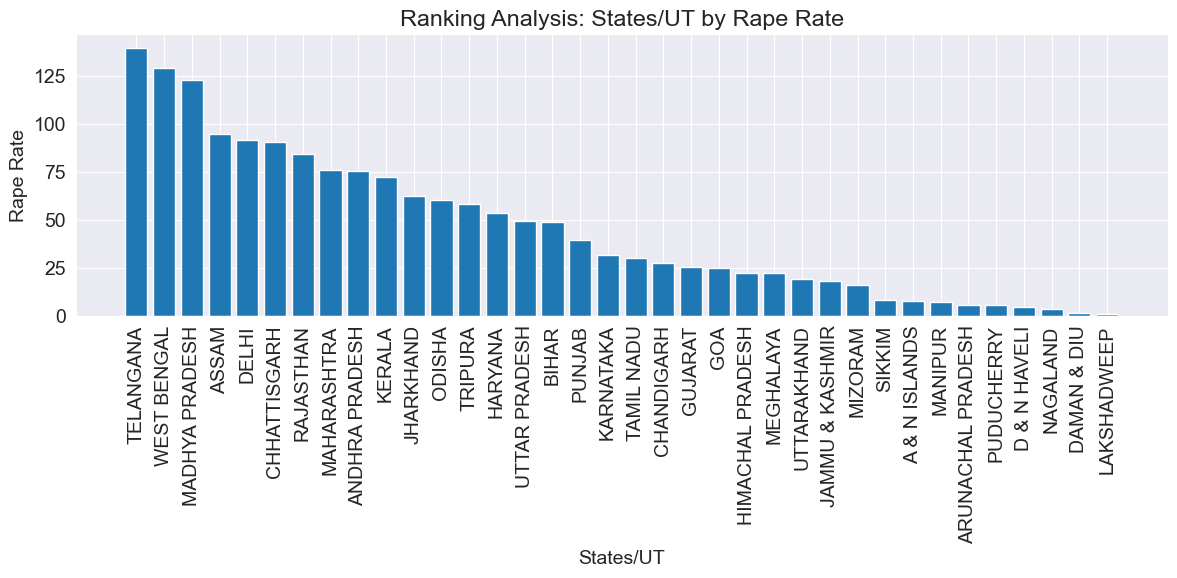

In [62]:
# rank_column = input("Enter crime by which you want to rank : ")
rank_column = 'Rape'

# Grouping the data by a 'STATE/UT' and calculating the mean for each crime type
crime_type_means = df.groupby('STATE/UT')[crime_types].mean()

# Rank the states based on the 'rank_column' (change 'ascending' as needed)
ranked_data = crime_type_means.sort_values(by=rank_column, ascending=False)

# Create a bar chart to visualize the ranking
plt.figure(figsize=(12, 6))
plt.bar(ranked_data.index, ranked_data[rank_column])
plt.title(f'Ranking Analysis: States/UT by {rank_column} Rate')
plt.xlabel('States/UT')
plt.ylabel(f'{rank_column} Rate')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the bar chart
plt.show()

Regression Equation: Rape = 0.42 * Assault on women with intent to outrage her modesty + 9.76
R-squared: 0.83


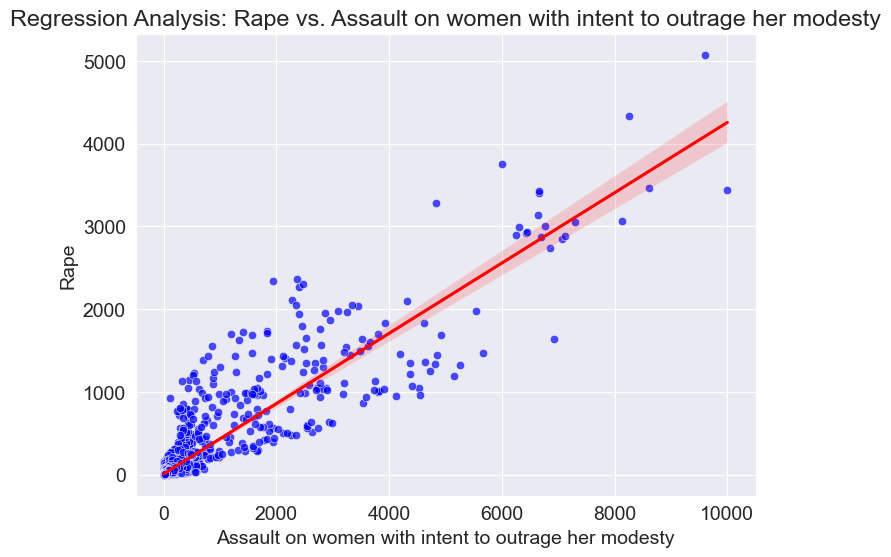

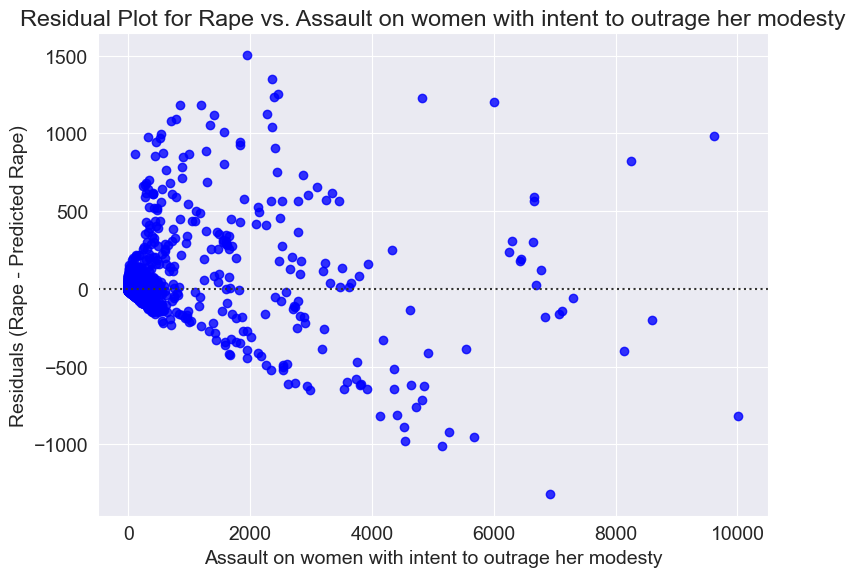

In [47]:
from sklearn.linear_model import LinearRegression

# Select the columns you want to analyze for regression
# For example, let's say you want to predict 'Rape' based on another variable, e.g., 'Assault on women with intent to outrage her modesty'
x_variable = 'Assault on women with intent to outrage her modesty'
y_variable = 'Rape'

# Create a scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=x_variable, y=y_variable, color='blue', alpha=0.7)
sns.regplot(data=df, x=x_variable, y=y_variable, scatter=False, color='red', line_kws={"color": "red"})

plt.title(f'Regression Analysis: {y_variable} vs. {x_variable}')
plt.xlabel(x_variable)
plt.ylabel(y_variable)

# Perform linear regression
X = df[x_variable].values.reshape(-1, 1)
y = df[y_variable].values.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(X, y)

# Print regression results
slope = regressor.coef_[0][0]
intercept = regressor.intercept_[0]
r_squared = regressor.score(X, y)
print(f'Regression Equation: {y_variable} = {slope:.2f} * {x_variable} + {intercept:.2f}')
print(f'R-squared: {r_squared:.2f}')

# Create a residual plot
plt.figure(figsize=(8, 6))
sns.residplot(data=df, x=x_variable, y=y_variable, color='blue')
plt.title(f'Residual Plot for {y_variable} vs. {x_variable}')
plt.xlabel(x_variable)
plt.ylabel(f'Residuals ({y_variable} - Predicted {y_variable})')

plt.tight_layout()
plt.show()
